In [ ]:
pip install tensorflow keras numpy matplotlib scikit-learn


Epoch 1/20
375/375 - 8s - loss: 0.2772 - accuracy: 0.9176 - val_loss: 0.1215 - val_accuracy: 0.9642 - 8s/epoch - 21ms/step
Epoch 2/20
375/375 - 7s - loss: 0.1081 - accuracy: 0.9670 - val_loss: 0.0946 - val_accuracy: 0.9726 - 7s/epoch - 19ms/step
Epoch 3/20
375/375 - 6s - loss: 0.0780 - accuracy: 0.9753 - val_loss: 0.0929 - val_accuracy: 0.9720 - 6s/epoch - 17ms/step
Epoch 4/20
375/375 - 7s - loss: 0.0596 - accuracy: 0.9810 - val_loss: 0.0855 - val_accuracy: 0.9750 - 7s/epoch - 19ms/step
Epoch 5/20
375/375 - 6s - loss: 0.0485 - accuracy: 0.9845 - val_loss: 0.0753 - val_accuracy: 0.9787 - 6s/epoch - 16ms/step
Epoch 6/20
375/375 - 7s - loss: 0.0412 - accuracy: 0.9865 - val_loss: 0.0810 - val_accuracy: 0.9780 - 7s/epoch - 19ms/step
Epoch 7/20
375/375 - 7s - loss: 0.0341 - accuracy: 0.9884 - val_loss: 0.0881 - val_accuracy: 0.9768 - 7s/epoch - 18ms/step
Epoch 8/20
375/375 - 7s - loss: 0.0322 - accuracy: 0.9890 - val_loss: 0.0829 - val_accuracy: 0.9783 - 7s/epoch - 18ms/step
Epoch 9/20
375/3

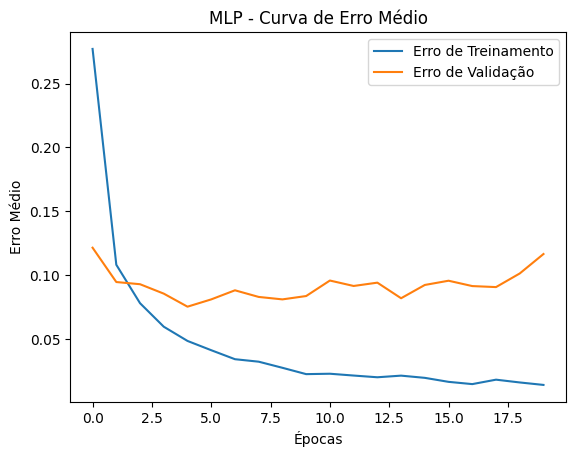

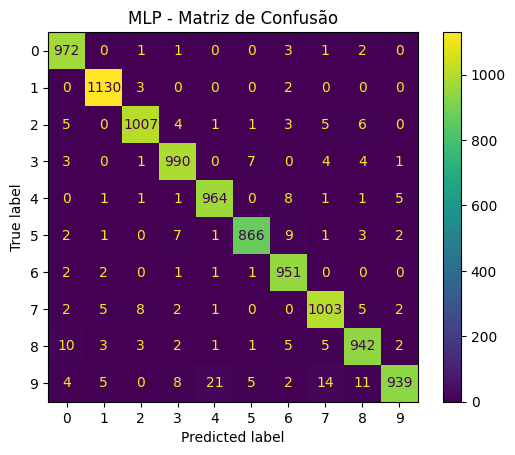

Epoch 1/20
375/375 - 48s - loss: 0.4296 - accuracy: 0.8645 - val_loss: 0.0839 - val_accuracy: 0.9743 - 48s/epoch - 127ms/step
Epoch 2/20
375/375 - 43s - loss: 0.1229 - accuracy: 0.9642 - val_loss: 0.0513 - val_accuracy: 0.9837 - 43s/epoch - 115ms/step
Epoch 3/20
375/375 - 43s - loss: 0.0839 - accuracy: 0.9752 - val_loss: 0.0458 - val_accuracy: 0.9860 - 43s/epoch - 115ms/step
Epoch 4/20
375/375 - 43s - loss: 0.0691 - accuracy: 0.9802 - val_loss: 0.0396 - val_accuracy: 0.9884 - 43s/epoch - 116ms/step
Epoch 5/20
375/375 - 43s - loss: 0.0535 - accuracy: 0.9843 - val_loss: 0.0370 - val_accuracy: 0.9898 - 43s/epoch - 114ms/step
Epoch 6/20
375/375 - 43s - loss: 0.0504 - accuracy: 0.9851 - val_loss: 0.0374 - val_accuracy: 0.9883 - 43s/epoch - 113ms/step
Epoch 7/20
375/375 - 45s - loss: 0.0441 - accuracy: 0.9864 - val_loss: 0.0393 - val_accuracy: 0.9898 - 45s/epoch - 121ms/step
Epoch 8/20
375/375 - 43s - loss: 0.0394 - accuracy: 0.9883 - val_loss: 0.0329 - val_accuracy: 0.9910 - 43s/epoch - 114

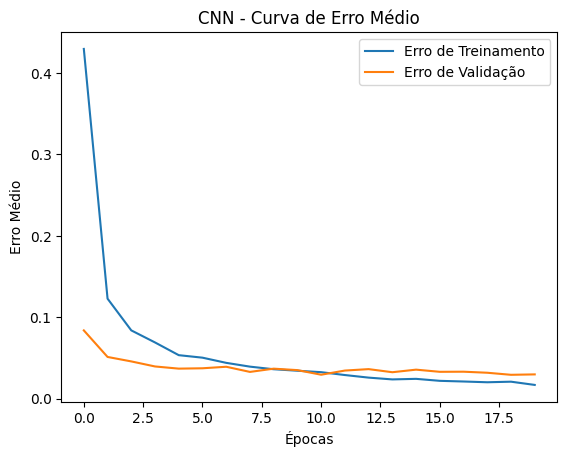

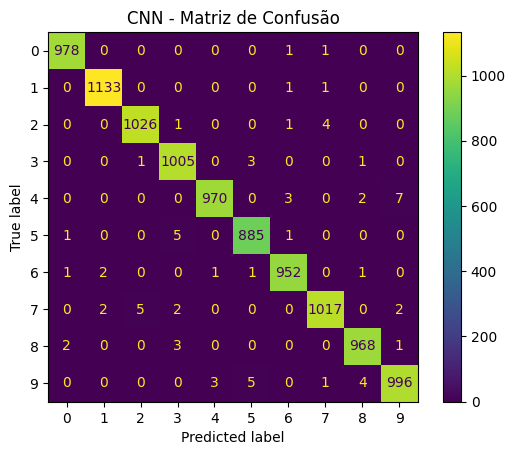

MLP - Acurácia: 0.9764
MLP - Precisão: 0.9764
MLP - Revocação: 0.9762
MLP - F1 Score: 0.9762
CNN - Acurácia: 0.9930
CNN - Precisão: 0.9929
CNN - Revocação: 0.9929
CNN - F1 Score: 0.9929


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Carregar e pré-processar os dados do MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# Função para plotar as curvas de erro
def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Erro de Treinamento')
    plt.plot(history.history['val_loss'], label='Erro de Validação')
    plt.title(title)
    plt.xlabel('Épocas')
    plt.ylabel('Erro Médio')
    plt.legend()
    plt.show()

# Função para calcular e exibir a matriz de confusão
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
    disp.plot(cmap='viridis')
    plt.title(title)
    plt.show()

# Implementar a rede neural perceptron de múltiplas camadas
mlp_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar a rede neural perceptron de múltiplas camadas
history_mlp = mlp_model.fit(X_train, y_train_one_hot, epochs=20, validation_split=0.2, batch_size=128, verbose=2)

# Avaliar o modelo MLP
loss_mlp, accuracy_mlp = mlp_model.evaluate(X_test, y_test_one_hot)
print(f'MLP Test accuracy: {accuracy_mlp:.4f}')

# Fazer predições com o modelo MLP
y_pred_mlp = np.argmax(mlp_model.predict(X_test), axis=1)

# Plotar curva de erro e matriz de confusão do MLP
plot_loss(history_mlp, 'MLP - Curva de Erro Médio')
plot_confusion_matrix(y_test, y_pred_mlp, 'MLP - Matriz de Confusão')

# Implementar a rede neural convolucional
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar a rede neural convolucional
history_cnn = cnn_model.fit(X_train, y_train_one_hot, epochs=20, validation_split=0.2, batch_size=128, verbose=2)

# Avaliar o modelo CNN
loss_cnn, accuracy_cnn = cnn_model.evaluate(X_test, y_test_one_hot)
print(f'CNN Test accuracy: {accuracy_cnn:.4f}')

# Fazer predições com o modelo CNN
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)

# Plotar curva de erro e matriz de confusão do CNN
plot_loss(history_cnn, 'CNN - Curva de Erro Médio')
plot_confusion_matrix(y_test, y_pred_cnn, 'CNN - Matriz de Confusão')

# Calcular e imprimir métricas de desempenho
def print_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f'{model_name} - Acurácia: {accuracy:.4f}')
    print(f'{model_name} - Precisão: {precision:.4f}')
    print(f'{model_name} - Revocação: {recall:.4f}')
    print(f'{model_name} - F1 Score: {f1:.4f}')

print_metrics(y_test, y_pred_mlp, 'MLP')
print_metrics(y_test, y_pred_cnn, 'CNN')


